***Data Set 1 : Exploration***
https://www.kaggle.com/datasets/henryshan/2023-data-scientists-salary/data

General Info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

data = pd.read_csv("../raw_data/ds_salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


******

***Job Titles*** --> use grouped titles for website

In [2]:
job_titles = data["job_title"].unique()

# keywords
keywords = ["Data Scien",  "Machine Learning", "Analyst" , "Engineer" ]
# old list long: keywords = ["Data Scien",  "Machine Learning", "Analyst", "Engineer", "Research", "Analytics", "Vision", "Architect", "Developer", "Manager", "Head", "Lead", "Cloud", "Specialist", "Principal"]


# create dictionary
clusters = {keyword: [] for keyword in keywords}
clusters["Others"] = []

# assign job titles
for title in job_titles:
    matched = False
    for keyword in keywords:
        if keyword.lower() in title.lower():
            clusters[keyword].append(title)
            matched = True
    if not matched:
        clusters["Others"].append(title)

# print clusters
for keyword, titles in clusters.items():
    print(f"\nCluster für '{keyword}':")
    for title in titles:
        print(title)

#Assign cluster in new column
def assign_cluster(title):
    for keyword in keywords:
        if keyword.lower() in title.lower():
            return keyword
    return "Others"

data['job_title_cluster'] = data['job_title'].apply(assign_cluster)


Cluster für 'Data Scien':
Principal Data Scientist
Data Scientist
Applied Data Scientist
Data Science Manager
Director of Data Science
Lead Data Scientist
Data Science Lead
Data Science Consultant
Head of Data Science
Data Science Engineer
Data Science Tech Lead
Data Scientist Lead
Product Data Scientist
Staff Data Scientist

Cluster für 'Machine Learning':
Machine Learning Engineer
Applied Machine Learning Engineer
Machine Learning Researcher
Machine Learning Scientist
Applied Machine Learning Scientist
Machine Learning Infrastructure Engineer
Machine Learning Software Engineer
Machine Learning Research Engineer
Machine Learning Developer
Principal Machine Learning Engineer
Machine Learning Manager
Lead Machine Learning Engineer
Head of Machine Learning

Cluster für 'Analyst':
Data Analyst
Data Quality Analyst
Compliance Data Analyst
Business Data Analyst
Staff Data Analyst
Lead Data Analyst
Financial Data Analyst
BI Analyst
BI Data Analyst
Insight Analyst
Product Data Analyst
Data O

In [3]:
data['job_title_cluster'].value_counts(normalize=True) * 100

job_title_cluster
Engineer            35.019973
Data Scien          26.284953
Analyst             18.215712
Others              10.492676
Machine Learning     9.986684
Name: proportion, dtype: float64

In [4]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_cluster
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scien
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,Engineer
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,Engineer
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Data Scien
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Data Scien


***Duplicates***

In [5]:
data.duplicated().sum() #1171 duplicates
data = data.drop_duplicates()


Length dataset
- 3755 before removing duplicats
- 2584 after removing duplicats

***Cleaning, Outliers etc...***

In [6]:
# data.isnull().sum() --> no missing data!
#data.boxplot() # Salary has outliers. But not relevant, since salary is the target.

<Axes: >

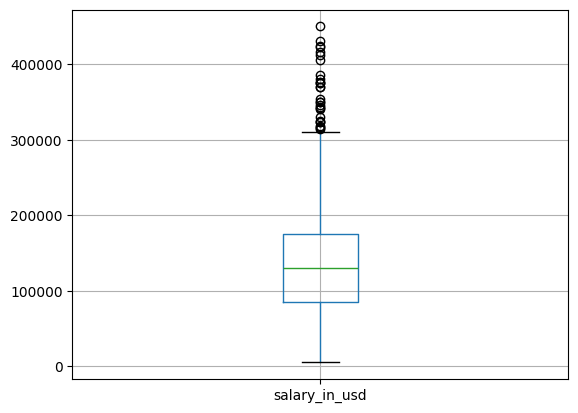

In [7]:
data[["salary_in_usd"]].boxplot()

***Imbalance (Countries, employment type etc...)***

In [8]:
data.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_cluster
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Data Scien


In [9]:
data["experience_level"].value_counts(normalize=True) * 100

experience_level
SE    60.139319
MI    25.696594
EN    10.448916
EX     3.715170
Name: proportion, dtype: float64

In [10]:
data["employment_type"].value_counts(normalize=True) * 100

employment_type
FT    98.568111
PT     0.657895
CT     0.386997
FL     0.386997
Name: proportion, dtype: float64

In [11]:
data["job_title"].value_counts(normalize=True)* 100

job_title
Data Engineer                23.142415
Data Scientist               20.820433
Data Analyst                 15.325077
Machine Learning Engineer     7.972136
Analytics Engineer            3.521672
                               ...    
Compliance Data Analyst       0.038700
Deep Learning Researcher      0.038700
Staff Data Analyst            0.038700
Data DevOps Engineer          0.038700
Finance Data Analyst          0.038700
Name: proportion, Length: 93, dtype: float64

In [12]:
countries = data["company_location"].value_counts()
countries.head(10)

company_location
US    1929
GB     155
CA      83
IN      57
DE      55
ES      44
FR      33
BR      15
AU      14
PT      14
Name: count, dtype: int64

In [13]:
#countries_grouped = data ["countries_grouped"].value_counts()

In [14]:
data["company_size"].value_counts(normalize=True) * 100

company_size
M    78.482972
L    15.828173
S     5.688854
Name: proportion, dtype: float64

balancing needed? 
- experience_level
- job_title ? 



Results of differenct changes (variation, because of shuffle of the data). 
- include  work year and employment type: Ridge 0.45
- Log-Transformation on y 0.65 (with job titles grouped)
- use grouped job title instead of real one: no difference.
- Use real company_location instead of grouped: slightly better.
- employment type included or excluded: no difference. 

***Company location: Cluster the data (Raphael's clusters)***

In [15]:
#Group Countries by regions

# List of countries with more than 30 entries
high_entry_countries = ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR']

# Create a dictionary mapping each country to its region
country_to_region = {
    'NG': 'Rest_of_the_World', 'GH': 'Rest_of_the_World', 'KE': 'Rest_of_the_World', 'EG': 'Rest_of_the_World', 'DZ': 'Rest_of_the_World',
    'MA': 'Rest_of_the_World', 'ZA': 'Rest_of_the_World', 'AO': 'Rest_of_the_World', 'TN': 'Rest_of_the_World', 'CI': 'Rest_of_the_World',
    'CM': 'Rest_of_the_World', 'ET': 'Rest_of_the_World', 'SN': 'Rest_of_the_World', 'UG': 'Rest_of_the_World', 'TZ': 'Rest_of_the_World',
    'CD': 'Rest_of_the_World', 'ZW': 'Rest_of_the_World', 'MZ': 'Rest_of_the_World', 'NE': 'Rest_of_the_World', 'MW': 'Rest_of_the_World',
    'BJ': 'Rest_of_the_World', 'BF': 'Rest_of_the_World', 'ML': 'Rest_of_the_World', 'GN': 'Rest_of_the_World', 'TD': 'Rest_of_the_World',
    'SO': 'Rest_of_the_World', 'BI': 'Rest_of_the_World', 'LS': 'Rest_of_the_World', 'ER': 'Rest_of_the_World', 'LY': 'Rest_of_the_World',
    'NA': 'Rest_of_the_World', 'GQ': 'Rest_of_the_World', 'GW': 'Rest_of_the_World', 'SS': 'Rest_of_the_World', 'GA': 'Rest_of_the_World',
    'SL': 'Rest_of_the_World', 'CG': 'Rest_of_the_World', 'SZ': 'Rest_of_the_World', 'RE': 'Rest_of_the_World', 'ST': 'Rest_of_the_World',
    'YT': 'Rest_of_the_World', 'SC': 'Rest_of_the_World', 'ZM': 'Rest_of_the_World', 'BW': 'Rest_of_the_World', 'CV': 'Rest_of_the_World',
    'MU': 'Rest_of_the_World', 'KM': 'Rest_of_the_World', 'GM': 'Rest_of_the_World', 'GW': 'Rest_of_the_World', 'TG': 'Rest_of_the_World',
    'BJ': 'Rest_of_the_World', 'AO': 'Rest_of_the_World', 'MW': 'Rest_of_the_World', 'ZW': 'Rest_of_the_World', 'CD': 'Rest_of_the_World',
    'HK': 'Rest_of_Asia', 'SG': 'Rest_of_Asia', 'TH': 'Rest_of_Asia', 'VN': 'Rest_of_Asia', 'MY': 'Rest_of_Asia',
    'PH': 'Rest_of_Asia', 'ID': 'Rest_of_Asia', 'JP': 'Rest_of_Asia', 'CN': 'Rest_of_Asia', 'KR': 'Rest_of_Asia',
    'TW': 'Rest_of_Asia', 'PK': 'Rest_of_Asia', 'BD': 'Rest_of_Asia', 'LK': 'Rest_of_Asia',
    'NP': 'Rest_of_Asia', 'MM': 'Rest_of_Asia', 'KH': 'Rest_of_Asia', 'BN': 'Rest_of_Asia', 'TL': 'Rest_of_Asia',
    'MN': 'Rest_of_Asia', 'UZ': 'Rest_of_Asia', 'TM': 'Rest_of_Asia', 'KG': 'Rest_of_Asia', 'TJ': 'Rest_of_Asia',
    'AZ': 'Rest_of_Asia', 'GE': 'Rest_of_Asia', 'AM': 'Rest_of_Asia', 'SY': 'Rest_of_Asia', 'IQ': 'Rest_of_Asia',
    'LB': 'Rest_of_Asia', 'JO': 'Rest_of_Asia', 'PS': 'Rest_of_Asia', 'KW': 'Rest_of_Asia', 'SA': 'Rest_of_Asia',
    'OM': 'Rest_of_Asia', 'YE': 'Rest_of_Asia', 'AE': 'Rest_of_Asia', 'QA': 'Rest_of_Asia', 'BH': 'Rest_of_Asia',
    'IR': 'Rest_of_Asia', 'AF': 'Rest_of_Asia', 'TL': 'Rest_of_Asia', 'MV': 'Rest_of_Asia', 'BT': 'Rest_of_Asia',
    'AR': 'Latin_America', 'BO': 'Latin_America', 'BR': 'Latin_America', 'CL': 'Latin_America',
    'CO': 'Latin_America', 'EC': 'Latin_America', 'FK': 'Latin_America', 'GF': 'Latin_America',
    'GY': 'Latin_America', 'PE': 'Latin_America', 'PY': 'Latin_America', 'SR': 'Latin_America',
    'UY': 'Latin_America', 'VE': 'Latin_America', 'MX': 'Latin_America', 'CR': 'Latin_America',
    'DO': 'Latin_America', 'GT': 'Latin_America', 'HN': 'Latin_America', 'NI': 'Latin_America',
    'PA': 'Latin_America', 'SV': 'Latin_America', 'BZ': 'Latin_America', 'BB': 'Latin_America',
    'CU': 'Latin_America', 'JM': 'Latin_America', 'HT': 'Latin_America', 'TT': 'Latin_America',
    'BS': 'Latin_America', 'LC': 'Latin_America', 'GD': 'Latin_America', 'AG': 'Latin_America',
    'DM': 'Latin_America', 'VC': 'Latin_America', 'KN': 'Latin_America',
    'AU': 'Rest_of_the_World', 'FJ': 'Rest_of_the_World', 'KI': 'Rest_of_the_World', 'MH': 'Rest_of_the_World', 'FM': 'Rest_of_the_World',
    'NR': 'Rest_of_the_World', 'NZ': 'Rest_of_the_World', 'PW': 'Rest_of_the_World', 'PG': 'Rest_of_the_World', 'WS': 'Rest_of_the_World',
    'SB': 'Rest_of_the_World', 'TO': 'Rest_of_the_World', 'TV': 'Rest_of_the_World', 'VU': 'Rest_of_the_World',
    'AT': 'Rest_of_Europe', 'BE': 'Rest_of_Europe', 'BG': 'Rest_of_Europe', 'HR': 'Rest_of_Europe', 'CY': 'Rest_of_Europe',
    'CZ': 'Rest_of_Europe', 'DK': 'Rest_of_Europe', 'EE': 'Rest_of_Europe', 'FI': 'Rest_of_Europe',
    'GR': 'Rest_of_Europe', 'HU': 'Rest_of_Europe', 'IS': 'Rest_of_Europe', 'IE': 'Rest_of_Europe',
    'IT': 'Rest_of_Europe', 'LV': 'Rest_of_Europe', 'LT': 'Rest_of_Europe', 'LU': 'Rest_of_Europe', 'MT': 'Rest_of_Europe',
    'NL': 'Rest_of_Europe', 'NO': 'Rest_of_Europe', 'PL': 'Rest_of_Europe', 'PT': 'Rest_of_Europe', 'RO': 'Rest_of_Europe',
    'RU': 'Rest_of_Europe', 'SK': 'Rest_of_Europe', 'SI': 'Rest_of_Europe', 'SE': 'Rest_of_Europe',
    'CH': 'Rest_of_Europe', 'UA': 'Rest_of_Europe', 'RS': 'Rest_of_Europe', 'MD': 'Rest_of_Europe',
    'ME': 'Rest_of_Europe', 'MK': 'Rest_of_Europe', 'AL': 'Rest_of_Europe', 'BA': 'Rest_of_Europe', 'XK': 'Rest_of_Europe',
    'BY': 'Rest_of_Europe', 'AD': 'Rest_of_Europe', 'MC': 'Rest_of_Europe', 'SM': 'Rest_of_Europe', 'LI': 'Rest_of_Europe',
    'VA': 'Rest_of_Europe'
}
# Ensure countries with high entries remain their own category
for country in high_entry_countries:
    country_to_region[country] = country

# Function to map company location to regions or keep it unchanged for high entry countries
def map_location(location):
    if location in high_entry_countries:
        return location
    return country_to_region.get(location, 'Rest_of_the_World')  # Default to 'Rest_of_the_World' if not found in the dictionary

# Create the new column company_location_grouped
data['company_location_grouped'] = data['company_location'].apply(map_location)

# Count the number of entries for each region and high-entry country
region_counts = data['company_location_grouped'].value_counts()
print(region_counts)

company_location_grouped
US                   1929
GB                    155
Rest_of_Europe        116
CA                     83
IN                     57
DE                     55
ES                     44
Rest_of_the_World      43
Latin_America          37
FR                     33
Rest_of_Asia           32
Name: count, dtype: int64


***X,y Train, Test, Split***

In [16]:
#log transformation on y to improve results --> very helpful
import numpy as np
data["salary_in_usd_log"] = np.log(data['salary_in_usd'] + 0.0000001)
data["salary_in_usd"]

# The predicted salary needs to be transformed back:
#predicted_log_salary = model.predict([[6, 5]]) #Run the model, not like this, just an example.
#predicted_salary = np.exp(predicted_log_salary) #Transform value back

0        85847
1        30000
2        25500
3       175000
4       120000
         ...  
3750    412000
3751    151000
3752    105000
3753    100000
3754     94665
Name: salary_in_usd, Length: 2584, dtype: int64

decision: We use company_location_grouped on the website an in the model... change for production

In [17]:
X = data.drop(columns=["salary", "salary_currency", "salary_in_usd", "salary_in_usd_log", "company_location", "job_title", "employment_type"])
y = data ["salary_in_usd_log"]
X.head(5)

#--> change to: employee_residence grouped

,work_year,experience_level,employee_residence,remote_ratio,company_size,job_title_cluster,company_location_grouped
0,2023,SE,ES,100,L,Data Scien,ES
1,2023,MI,US,100,S,Engineer,US
2,2023,MI,US,100,S,Engineer,US
3,2023,SE,CA,100,M,Data Scien,CA
4,2023,SE,CA,100,M,Data Scien,CA


We only scale X, there only the column remote_ratio contains numerical values (100,   0,  50). If scaling is necessary depends on the ML model. 

We don't scale y.... But in case we need to: salary contains outliers, therefore Robust Scaler is the best choice. 

In [43]:
# Train-Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state=1)
#parameter "random seed", "random state"
#shuffle breaks up date
#random state: generator for the shuffleabs


***Encoding the data***


Colums without order: 
- One hot encoder
- Job_title, employee_residence,company_location

Columns with order: 
- Ordinal Encoder
- work_year, experience_level, employment_type, remote_ratio, company_size


--> After Encoding; Setup a preprocessing pipeline, to encode all features. 

In [44]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Assign features to encoder-version                                                              #here
categorical_col = ["job_title_cluster", "company_location_grouped", "employee_residence"]
ordinal_col = ["work_year", "experience_level", "company_size"]

# Define categories for ordinal_col                                                                #here
work_year_categories = ["2020", "2021", "2022", "2023"]
experience_level_categories = ["EN", "MI", "SE", "EX"]
employment_type_categories = ["PT", "FT", "CT", "FL"]
company_size_categories = ["S", "M", "L"]

# Combine ordinal categories into final list
categories = [work_year_categories, experience_level_categories, company_size_categories]     #here

# Instantiate OrdinalEncoder with categories
ordinal_encoder = OrdinalEncoder(categories=categories)
categorial_encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')

# Create a pipeline for ordinal encoding and scaling
ordinal_pipeline = Pipeline([
    ('ordinal_encoder', ordinal_encoder),
    ('scaler', StandardScaler())
])

# Parallelize the encoders
preprocessor = ColumnTransformer([
    ('ordinal_pipeline', ordinal_pipeline, ordinal_col),
    ('categorial_encoder', categorial_encoder, categorical_col)
])


In [45]:
X_train

,work_year,experience_level,employee_residence,remote_ratio,company_size,job_title_cluster,company_location_grouped
911,2023,SE,US,100,M,Engineer,US
2685,2022,SE,US,100,M,Analyst,US
399,2023,SE,US,100,M,Analyst,US
2051,2022,SE,US,0,M,Data Scien,US
1722,2023,SE,US,0,M,Engineer,US
...,...,...,...,...,...,...,...
1415,2023,EN,US,0,M,Engineer,US
1317,2023,SE,US,0,M,Data Scien,US
1657,2023,SE,US,0,M,Engineer,US
260,2023,SE,US,100,M,Data Scien,US


In [46]:
# Create a  regressor
regressor = Ridge()

# Create a pipeline that includes the preprocessor and the regressor
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model.score(X_test, y_test) # Score model

0.6506427321869406

In [47]:
model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ordinal_pipeline',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(categories=[['2020',
                                                                                               '2021',
                                                                                               '2022',
                                                                                               '2023'],
                                                                                              ['EN',
                                                                                               'MI',
                                                                                               'SE',
                                                                                               'EX'],
                                                                                              ['S',
                                                                                               'M',
                                                                                               'L']])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['work_year',
                                                   'experience_level',
                                                   'company_size']),
                                                 ('categorial_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['job_title_cluster',
                                                   'company_location_grouped',
                                                   'employee_residence'])])),
                ('regressor', Ridge())])

***Regression with different methods***
below are different methods tested, the best integrated in the model above

In [48]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.0025437343631773413

In [49]:
# Linear Regression --> Bullshit
regressor = LinearRegression()

# Create a pipeline that includes the preprocessor and the regressor
model2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model2.fit(X_train, y_train)

y_pred = model.predict(X_test)
model2.score(X_test, y_test) # Score model

-6.170281971655991e+19

In [50]:
from sklearn.linear_model import ElasticNet
# Elastic Net
regressor = ElasticNet()

# Create a pipeline that includes the preprocessor and the regressor
model3 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model3.fit(X_train, y_train)

y_pred = model.predict(X_test)
model3.score(X_test, y_test) # Score model

-0.0025437343631773413

In [51]:
from sklearn.linear_model import Ridge
# Ridge
regressor = Ridge()

# Create a pipeline that includes the preprocessor and the regressor
model4 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model4.fit(X_train, y_train)

y_pred = model.predict(X_test)
model4.score(X_test, y_test) # Score model

0.6506427321869406

In [52]:
from sklearn.linear_model import Lasso
# Lasso
regressor = Lasso(alpha=1.0, max_iter=10000)

# Create a pipeline that includes the preprocessor and the regressor
model5 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model5.fit(X_train, y_train)

y_pred = model.predict(X_test)
model5.score(X_test, y_test) # Score model

-0.0025437343631773413

In [ ]:
from sklearn.svm import SVR
# SVR
regressor = SVR()

# Create a pipeline that includes the preprocessor and the regressor
model6 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit and transform your data with the preprocessor
model6.fit(X_train, y_train)

y_pred = model.predict(X_test)
model6.score(X_test, y_test) # Score model

***Random Forest Regressor***

In [ ]:
X_train

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

regr = RandomForestRegressor()
regr.fit(X_train_preprocessed, y_train)

regr.score(X_test_preprocessed, y_test)
